<a href="https://colab.research.google.com/github/yusrakhalid456/Github-Portfolio-Quantitative-finance/blob/main/Modern_portfolio_theory2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  7 of 7 completed


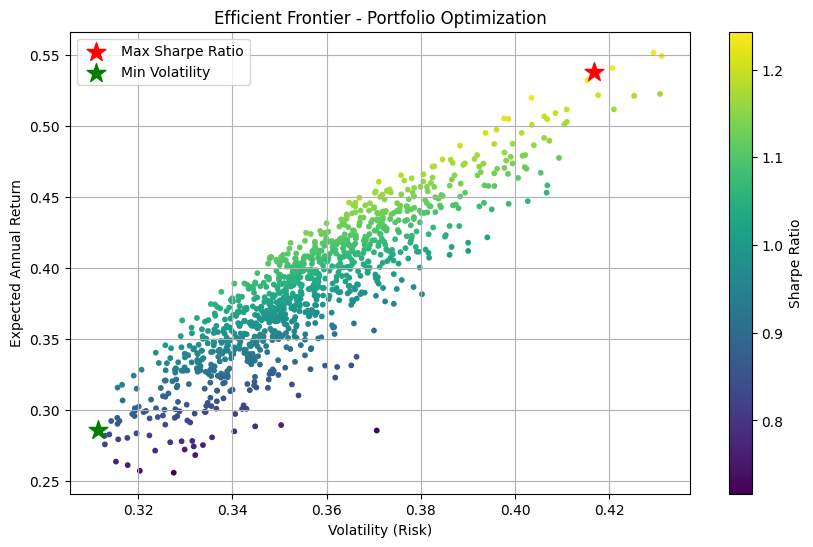

🔹 Optimal Portfolio (Max Sharpe Ratio):

META     30.10%
NVDA     28.84%
AAPL     18.25%
AMZN      9.04%
GOOGL     7.26%
TSLA      6.27%
MSFT      0.24%
dtype: object


In [4]:
# 📈 Portfolio Optimization using Monte Carlo Simulation
# Works in Google Colab — no Streamlit required

!pip install yfinance matplotlib seaborn --quiet

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ Select Stocks and Time Period
# -----------------------------
tickers = ['AAPL','MSFT','GOOGL','AMZN','TSLA','META','NVDA']

start_date = "2020-01-01"
end_date = "2023-12-31"

# -----------------------------
# 2️⃣ Download Data
# -----------------------------
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Handle MultiIndex columns that yfinance creates for multiple tickers
if isinstance(data.columns, pd.MultiIndex):
    if 'Adj Close' in data.columns.levels[0]:
        data = data['Adj Close']
    elif 'Close' in data.columns.levels[0]:
        data = data['Close']
else:
    if 'Adj Close' in data.columns:
        data = data[['Adj Close']]
    elif 'Close' in data.columns:
        data = data[['Close']]

# Remove rows with missing values
data = data.dropna()

# -----------------------------
# 3️⃣ Calculate Daily Returns
# -----------------------------
daily_returns = data.pct_change().dropna()
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(tickers)

# -----------------------------
# 4️⃣ Monte Carlo Simulation
# -----------------------------
num_portfolios = 1000
results = np.zeros((3, num_portfolios))  # [Return, Volatility, Sharpe Ratio]
weights_record = []

risk_free_rate = 0.02  # 2% annual risk-free rate

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_record.append(weights)

    port_return = np.dot(weights, mean_returns) * 252   # annualized
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (port_return - risk_free_rate) / port_volatility

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# -----------------------------
# 5️⃣ Identify Optimal Portfolios
# -----------------------------
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
min_vol_idx = results_df['Volatility'].idxmin()

best_weights = pd.Series(weights_record[max_sharpe_idx], index=tickers)

# -----------------------------
# 6️⃣ Plot Efficient Frontier
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'],
            cmap='viridis', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Volatility'], results_df.loc[max_sharpe_idx, 'Return'],
            color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(results_df.loc[min_vol_idx, 'Volatility'], results_df.loc[min_vol_idx, 'Return'],
            color='g', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier - Portfolio Optimization')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Annual Return')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 7️⃣ Display Best Portfolio Weights
# -----------------------------
print("🔹 Optimal Portfolio (Max Sharpe Ratio):\n")
print(best_weights.sort_values(ascending=False).apply(lambda x: f"{x*100:.2f}%"))


